# DELITOS EN COLOMBIA PARA EL AÑO 2020


#### Autores:
1. Karen Vanessa Fonseca Vela
2. Sergio Alfredo Blanco Soler
3. Daniel Esteban Gómez Rodríguez


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) #Mostrar todas las columnas

# Base de Datos: Delitos 2020

Datos extraídos de la página oficial de la Policía Nacional de Colombia, la base delitos 2020 contienen información relacionada con los delitos de: homicidios, hurto de motocicletas, delitos sexuales y violencia intrafamiliar; dicha información se encuentra desagregada por variables de tiempo, modo y lugar.

Los datos publicados corresponden a consolidados de los Delitos de Impacto del país, así mismo la Actividad Operativa realizada por la Policía Nacional. Para 

Fuente: https://www.policia.gov.co/revistacriminalidad, donde encontrara los totales históricos por departamentos. Información extraída del Sistema de Información Estadístico, Delincuencial Contravencional y Operativo de la Policía Nacional – SIEDCO. Cifras sujetas a variación, en proceso de unificación con otros organismos del Estado.

Reporte delitos  año : 2020

# Importar datos

Datos extraídos de la página oficial de la policía nacional de colombia  "delitos de impacto"

Reporte delitos  año : 2020

Fuente:https://www.policia.gov.co/grupo-informaci%C3%B3n-criminalidad/estadistica-delictiva  


In [3]:
df_delitos = pd.read_csv('delitos_2020 (2).csv',
                         encoding='latin-1',
                         sep = ';', decimal=',',
                              dtype={
                     'CODIGO DANE': str
                 }
                        )

df_delitos.head(15)

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,MES,DIA,GENERO,AGRUPA EDAD PERSONA,CANTIDAD,DELITO
0,ANTIOQUIA,ABEJORRAL,5002000,SIN EMPLEO DE ARMAS,1/01/2020,ENERO,1,MASCULINO,ADULTOS,1,VIOLENCIA INTRAFAMILIAR
1,ANTIOQUIA,AMALFI,5031000,ARMA BLANCA / CORTOPUNZANTE,1/01/2020,ENERO,1,FEMENINO,ADULTOS,1,VIOLENCIA INTRAFAMILIAR
2,ANTIOQUIA,ANORÍ,5040000,CONTUNDENTES,1/01/2020,ENERO,1,FEMENINO,ADULTOS,1,VIOLENCIA INTRAFAMILIAR
3,ANTIOQUIA,ARBOLETES,5051000,CONTUNDENTES,1/01/2020,ENERO,1,FEMENINO,ADULTOS,1,VIOLENCIA INTRAFAMILIAR
4,ANTIOQUIA,BARBOSA,5079000,ARMA BLANCA / CORTOPUNZANTE,1/01/2020,ENERO,1,FEMENINO,ADULTOS,1,VIOLENCIA INTRAFAMILIAR
5,ANTIOQUIA,BARBOSA,5079000,ARMA BLANCA / CORTOPUNZANTE,1/01/2020,ENERO,1,FEMENINO,MENORES,1,VIOLENCIA INTRAFAMILIAR
6,ANTIOQUIA,BARBOSA,5079000,ARMA BLANCA / CORTOPUNZANTE,1/01/2020,ENERO,1,MASCULINO,ADOLESCENTES,1,VIOLENCIA INTRAFAMILIAR
7,ANTIOQUIA,BARBOSA,5079000,ARMA BLANCA / CORTOPUNZANTE,1/01/2020,ENERO,1,FEMENINO,ADULTOS,1,VIOLENCIA INTRAFAMILIAR
8,ANTIOQUIA,BARBOSA,5079000,CONTUNDENTES,1/01/2020,ENERO,1,FEMENINO,ADULTOS,1,VIOLENCIA INTRAFAMILIAR
9,ANTIOQUIA,BELLO,5088000,CONTUNDENTES,1/01/2020,ENERO,1,FEMENINO,ADULTOS,1,VIOLENCIA INTRAFAMILIAR


# Limpieza de datos


Se revisó la dimensión de la base de datos, adicionalmente el tipo de variable y la cantidad que existe de cada una.

In [4]:

print('delitos')
print('Filas: ', df_delitos.shape[0])
print('Columnas: ', df_delitos.shape[1])
df_delitos.info()

delitos
Filas:  168598
Columnas:  11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168598 entries, 0 to 168597
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DEPARTAMENTO         168598 non-null  object
 1   MUNICIPIO            168598 non-null  object
 2   CODIGO DANE          168598 non-null  object
 3   ARMAS MEDIOS         168583 non-null  object
 4   FECHA HECHO          168598 non-null  object
 5   MES                  168598 non-null  object
 6   DIA                  168598 non-null  int64 
 7   GENERO               168589 non-null  object
 8   AGRUPA EDAD PERSONA  166577 non-null  object
 9   CANTIDAD             168598 non-null  int64 
 10  DELITO               168598 non-null  object
dtypes: int64(2), object(9)
memory usage: 14.1+ MB


Se cuenta con una total de 168.598 registros y 11 columnas (Variables), de estas hay 4 de tipo numérico y 7 de tipo carácter, cabe aclarar que la información con la que se está desarrollando el proyecto corresponde a los delitos ocurridos a nivel departamental y municipal para el año 2020.

### Analísis de completitud:

Se revisaron los valores y el porcentaje de datos faltantes para cada variable.
Se puede observar que hay valores faltantes para las variables "ARMAS MEDIOS", "GENERO" y "AGRUPA EDAD PERSONA".

In [5]:

for col in df_delitos.columns:
    num_missing = df_delitos[col].isnull().sum()
    pct_missing = np.mean(df_delitos[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 4),num_missing))

DEPARTAMENTO - 0.0% - 0
MUNICIPIO - 0.0% - 0
CODIGO DANE - 0.0% - 0
ARMAS MEDIOS - 0.0089% - 15
FECHA HECHO - 0.0% - 0
MES - 0.0% - 0
DIA - 0.0% - 0
GENERO - 0.0053% - 9
AGRUPA EDAD PERSONA - 1.1987% - 2021
CANTIDAD - 0.0% - 0
DELITO - 0.0% - 0


Se procedió a añadir etiquetas a los registros con datos faltantes, ya que bajo el contexto de la base de datos en algunas variables se presentaron casos donde no se reporta información en alguna variable en específico, pero para las demás variables si se cuenta con toda la información.

Ahora reemplazamos los valores faltantes de cada variable por la nueva categoria que le asignaremos dependiendo de la varible.

Para la variable "Genero" se reemplazaron los valores faltantes por "NO APLICA”, a la variable "ARMAS MEDIOS" los valores faltantes se sustituyeron por la categoría "NO REPORTADO" y Para la variable "AGRUPA EDAD PERSONA" los valores faltantes se sustituyeron por la categoría "NO APLICA".

In [6]:
df_delitos["GENERO"]=df_delitos["GENERO"].replace(np.nan, "NO APLICA")
df_delitos["ARMAS MEDIOS"]=df_delitos["ARMAS MEDIOS"].replace(np.nan, "NO REPORTADO")
df_delitos["AGRUPA EDAD PERSONA"]=df_delitos["AGRUPA EDAD PERSONA"].replace(np.nan, "NO APLICA")
df_delitos1=df_delitos


Se revisó la nueva base de datos y se puede observar que ya no existen registros con datos faltantes. 

In [7]:

for col in df_delitos.columns:
    num_missing = df_delitos[col].isnull().sum()
    pct_missing = np.mean(df_delitos[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 4),num_missing))

DEPARTAMENTO - 0.0% - 0
MUNICIPIO - 0.0% - 0
CODIGO DANE - 0.0% - 0
ARMAS MEDIOS - 0.0% - 0
FECHA HECHO - 0.0% - 0
MES - 0.0% - 0
DIA - 0.0% - 0
GENERO - 0.0% - 0
AGRUPA EDAD PERSONA - 0.0% - 0
CANTIDAD - 0.0% - 0
DELITO - 0.0% - 0


### Analisís de coherencia


In [8]:
df_dedupped_delitos = df_delitos.drop_duplicates()
print(df_delitos.shape)
print(df_dedupped_delitos.shape)
print('Cantidad de duplicados',df_delitos.shape[0]-df_dedupped_delitos.shape[0])

(168598, 11)
(105872, 11)
Cantidad de duplicados 62726


Si bien la base de datos delitos 2020 presenta un total de 62.724 datos duplicados, se debe aclarar que de acuerdo con la dinámica de los datos que se registran en la misma, se tienen hechos que pueden ser reportados en la misma fecha, lugar y que concuerden con las demás variables, para estos casos hace referencias a los hechos que sucedieron bajo un delito específico en un conjunto familiar o de víctimas que pueden ser dentro de la misma zona pero casos reportados diferentes, por tanto, no corresponden a datos duplicados si no que obedece a la dinámica propia del fenómeno y dado que no se tiene un ID que identifique la víctimas como tal sino son los casos reportados bajo un mismo o distinto ámbito situacional.

# VISUALIZACIONES


### Modismo N° 1: Representación visual de los distintos delitos (delitos sexuales, homicidios y violencia intrafamiliar) respecto a la agrupación edad de las personas para el año 2020.

## Framework

####  What?

De acuerdo con el gráfico de barras siguiente, muestra los delitos por agrupación de edad; personas adultas, adolescentes y menores agregados por homicidios, violencia sexual y violencia intrafamiliar para el año 2020. De acuerdo con el tamaño de las barras se puede decir que las personas adultas son más vulnerables en delitos de violencia intrafamiliar que los menores, mientras que los menores son más vulnerables o reincidentes a estar afectados por delitos relacionados con violencia sexual que adolescentes y en menor medida en adultos. A partir del grafico se puede observar dos variables categóricas (agrupación edad de las personas y delitos) y la cantidad de delitos. Es un gráfico estático. Es a partir de un dataset tipo tabla con atributos (variables y categorías), no están ordenados, pero si agrupados y las barras están en función con la cantidad hechos por delito. El orden de la dirección de las barras es secuencial.

####  Why?

Se desea presentar lo que sucedió en el año 2020 en materia de delitos y en especial lo ocurrido en este año atípico dentro de los últimos 5 años, observando que tanto se han afectado los derechos humanos por agrupación de edad de las personas (adultos, menores y adolescentes) por los delitos de violencia intrafamiliar, violencia sexual y homicidios. Adicionalmente es poder descubrir y localizar donde están más enfocados ciertos delitos si en hombres o mujeres. La visualización intenta buscar estos sucesos en todos los hechos de delitos de 2020 para identificar hacia donde tienden a concentrarse los casos de delitos, se puede ver que los atributos (variables y categorías) están distribuidos de manera que se pueda conocer donde hay mayor afectación y a que agrupación edad de personas afecta más.

####  How?

Se utiliza el color para particionar y agrupar dentro de cada delito la cantidad de delitos por agrupación edad de las personas. El tipo de shape utilizado es de caja que en este caso particular son barras ubicadas de manera horizontal. también se puede hacer filtros de manera visual es decir si por delito que edad de personas son los más afectados y entre delitos se puede identificar quienes son los más vulnerables entre todos los delitos.

#### Marcas y canales 

El elemento gráfico para visualizar los delitos por la agrupación edad persona está basada en líneas, es decir, el gráfico de barras de manera que el canal es de posición horizontal para los atributos categóricos.

De acuerdo con el gráfico siguiente, la forma que controla la apariencia está ligada al color atributo a las variables categóricas, dado que los colores cambian de acuerdo con las categorías del delito y con base en la agrupación edad de las personas victimas por estos hechos. Desde la parte de la posición es de manera horizontal ya que permite leer de manera clara la etiqueta del delito si fuera vertical queda un poco sobrepuestas las etiquetas. El shape utilizado fueron cajas rectangulares más específicamente las barras, el tamaño está de acuerdo con la longitud, es decir, al atributo cuantitativo de la cantidad de hechos por los distintos delitos y agrupaciones edad persona.




In [9]:
df_delitos.columns = ['DEPARTAMENTO', 'MUNICIPIO', 'CODIGO_DANE', 'ARMAS_MEDIOS', 'FECHA_HECHO',"MES","DIA", 'GENERO',"AGRUPA_EDAD_PERSONA", "CANTIDAD", "DELITO"]
df_delitos_mod = df_delitos[df_delitos.AGRUPA_EDAD_PERSONA.isin(["ADOLESCENTES", "ADULTOS", "MENORES"])]


Text(0.5, 1.0, 'Personas Agrupadas por Edad, Victimas de Delitos 2020')

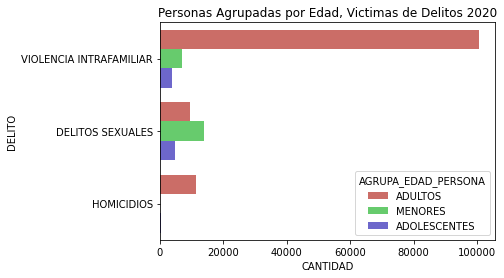

In [10]:
sns.barplot(data = df_delitos_mod,
            estimator = sum,
             palette = 'hls',
            x = "CANTIDAD", 
            y = "DELITO",
            hue = "AGRUPA_EDAD_PERSONA",
            ci = None)
plt.title ( 'Personas Agrupadas por Edad, Victimas de Delitos 2020' )

### Modismo N° 2: Representación visual de los distintos grupos de edad (adultos, adolescentes y menores) respecto a la la agrupacion del mes de ocurrencia y discriminado por genero

## Framework

#### What?
El grafico muestra la cantidad de víctimas de delitos durante el trascurso del año 2020 en Colombia, para esto se cuenta con tres variables categóricas y una ordenada cuantitativa. Respecto a las categóricas se encuentra la variable genero la cual esta discriminada entre masculino y femenino, también se tiene la variable edad la cual esta representada en tres categorías para las personas, estas son menores, adolescentes y personas adultas, además se tiene una variable categórica como son los meses del año. La variable cuantitativa hace referencia a la cantidad de victimas de delitos en Colombia para este año. Por ultimo se puede decir que los datos son de tipo tabla, ya que cuenta con cuatro atributos y diferentes ítems para representar la información.

#### Why? 
En las acciones de esta grafica se encuentra el analizar y presentar ya que uno de los objetivos es mostrar el impacto de los delitos en cuanto al genero y las edades de las personas durante el trascurso del año 2020.  
Por otro lado, respecto a las acciones de bajo y medio nivel, el grafico compara e identifica, ya que permite darse cuenta el género y rango de edad de las personas mas afectadas en los diferentes meses del año 2018.
El objetivo de la visualización es mostrar las incidencias que pueden tener las variables genero rango de edad y los meses del año, identificando relaciones entre las variables, por ejemplo, se puede observar que las mujeres en edad adulta y durante todo el trascurso del año 2020 fueron las más afectadas por los diferentes delitos. Además, es posible identificar si ciertos meses del año son mas proclives a presentar casos de delincuencia

#### How ?
La visualización representa un grafico de barras discriminado entre el genero de las personas, ordenando en secuencia respecto a la variable meses y filtrando por la variable edad, con el fin de asociar cuatro variables como lo son género, mes, edad y cantidad de delitos presentados

#### Marcas y canales
Esta visualización presenta marca de líneas, en este caso son las barras además presenta un canal de posición vertical para representar de forma ordenada los meses del año, un canal de posición horizontal para representar la cantidad de victimas de los delitos y otro canal de posición horizontal para discriminar los datos entre género. 
Por ultimo se presenta un canal de color para identificar las tres categorías de la variable edad.


In [11]:
df2  = df_delitos[df_delitos['GENERO'] == "MASCULINO"]
df3  = df_delitos[df_delitos['GENERO'] == "FEMENINO"]
df_delitos2 =  df2.append(df3)

df4 = df_delitos2[df_delitos2["AGRUPA_EDAD_PERSONA"] != "NO APLICA"]


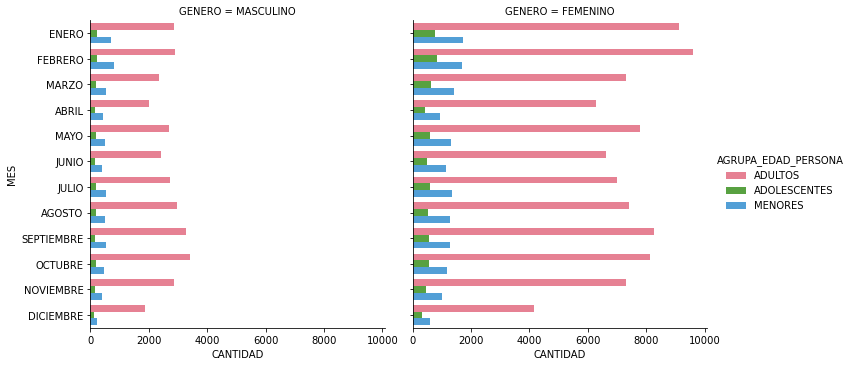

In [15]:
sns.catplot(data = df4,
            kind = "bar",
            estimator = sum,
            x = "CANTIDAD",
            y = "MES",
            hue = "AGRUPA_EDAD_PERSONA",
            col = "GENERO",           
            palette = 'husl',
            ci = None)



### Modismo N° 3: Representación visual del porcentajes de delitos por genero y tipo de delito(delitos sexuales, homicidios y violencia intrafamiliar) para el año 2020.

## Framework

#### What?
Esta gráfica corresponde a un dataset tipo tabla con items y atributos, utiliza dos variables categóricas (Género y tipo de delitos)  y una cuantitativa secuencial (Cantidad de delitos)  expresada en porcentaje adicionalmente es un gráfico estático.

#### Why?

**Verbo:** Esta visualización pretende presentar y explicar  la gravedad de  tres tipos de delito (Delitos sexuales, Homicidios y Violencia intrafamiliar) con respecto al género de las víctimas ( Femenino y Masculino) para el año 2020 a nivel general en Colombia (Ubicación conocida por el usuario), el gráficos es de tipo comparativo puesto que lo que se intenta mostrar es que el género  más afectado por cada delito.

**Sustantivo:** La visualización tiene como objetivo mostrar la comparación del maltrato de género de acuerdo al tipo de delito. Para los delitos sexuales y violencia intrafamiliar  sabemos previamente que  las mujeres  tienden a ser la más afectada y el gráfico afirma que es así, sobretodo para 2020 que fue un año de cuarentenas recurrentes y para los homicidios se tiene que los hombres son los más afectados.

#### How?
Es un gráfico de barras que separa las categorías de delitos y género, utilizando la frecuencia o número de delitos cometidos por cada tipo, por medio de un filtro de los tipos de delito y el género se obtiene los datos necesarios para llevar a cabo el BarPlot.

#### Marcas y canales
Esta  visualización utiliza marca de línea que en este caso son las barras, un canal de posición que es vertical de acuerdo a  la variable cuantitativa (Cantidad de delitos) y para la variables categóricas (Género y tipo de delito) se utiliza el canal de posición horizontal.


In [30]:

df = (df_delitos.groupby(["DELITO", "GENERO"])["CANTIDAD"].count()
        .groupby(level=0)
        .apply(lambda x:round( x / x.sum()*100,2))
        .reset_index(name='DELITOS(%)'))

df1=df.drop([2,5,8],axis=0)
df1

,DELITO,GENERO,DELITOS(%)
0,DELITOS SEXUALES,FEMENINO,84.09
1,DELITOS SEXUALES,MASCULINO,15.91
3,HOMICIDIOS,FEMENINO,8.00
4,HOMICIDIOS,MASCULINO,92.00
6,VIOLENCIA INTRAFAMILIAR,FEMENINO,77.87
7,VIOLENCIA INTRAFAMILIAR,MASCULINO,22.12


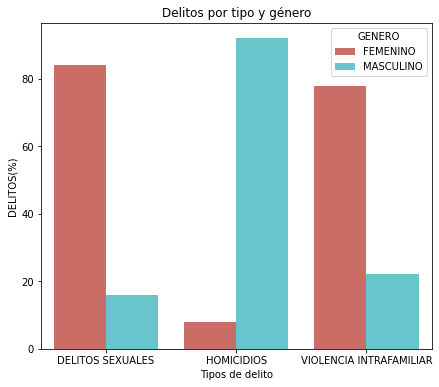

In [44]:
# grafico (Modismo I)

# grafico (Modismo I)

md1=sns.barplot(x="DELITO", y="DELITOS(%)", hue="GENERO",data=df1,palette="hls",ci="None")
md1.set_title("Delitos por tipo y género")
md1.set_xlabel("Tipos de delito")
plt.rcParams["figure.figsize"] = (7, 6)
plt.show()